In [1]:
#pip install KDE-diffusion

In [2]:
import numpy as np
from kde_diffusion import kde1d
from scipy.stats import expon
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity

np.random.seed(0)

In [3]:
# Sample data points from normal distribution.
x  = expon.rvs(size=1000)

In [4]:
from sklearn.model_selection import GridSearchCV, LeaveOneOut

bandwidths = 10 ** np.linspace(-1, 1, 100)
grid_cv = GridSearchCV(KernelDensity(kernel='gaussian'),
                    {'bandwidth': bandwidths},
                    cv=LeaveOneOut())

grid_cv.fit(x[:, None]);

In [5]:
h_star_cv = grid_cv.best_params_['bandwidth']
h_star_cv

0.18307382802953684

In [6]:
kde_cv = KernelDensity(kernel='gaussian', bandwidth=h_star_cv).fit(x[:, None])

In [7]:
x_grid = np.linspace(x.min(), x.max(), 1000)
pdf_kde_cv = np.exp(kde_cv.score_samples(x_grid[:, None]))

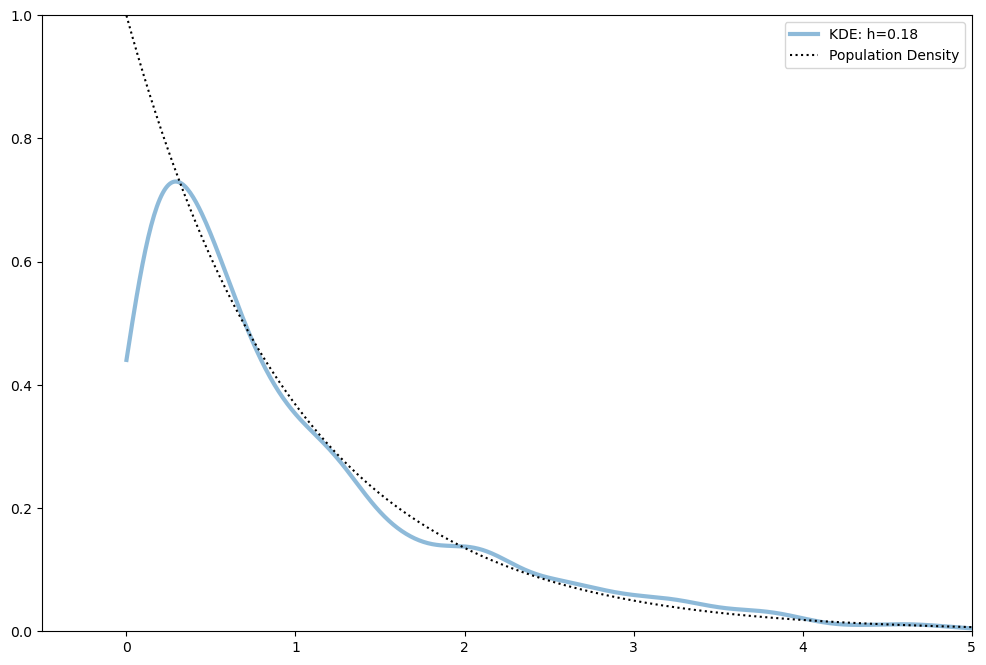

In [8]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(x_grid, pdf_kde_cv, linewidth=3, alpha=0.5, label='KDE: ' 'h=%.2f' % kde_cv.bandwidth)
ax.plot(x_grid, expon.pdf(x_grid), label='Population Density', linestyle=':', color='black')

plt.xlim(-.5,5)
plt.ylim(0,1)
plt.legend()

In [9]:
# Estimate density within ±5 standard deviations.
(density, grid, bandwidth) = kde1d(x, n=256, limits=5)

# Calculate actual density on same grid.
actual = expon.pdf(grid)

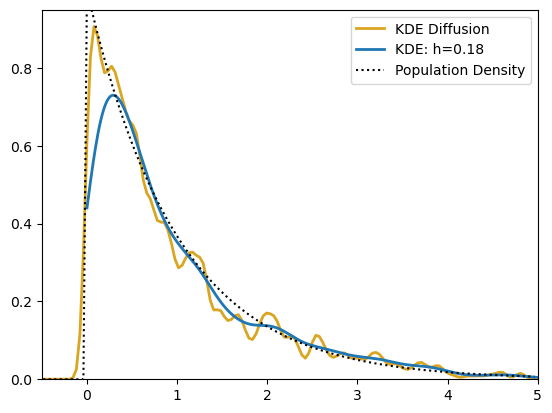

In [10]:
# Plot estimated and actual density.
figure = plt.figure()
axes = figure.add_subplot()
axes.plot(grid, density, label='KDE Diffusion', linewidth=2, color='goldenrod')
axes.plot(x_grid, pdf_kde_cv, linewidth=2,  label='KDE: ' 'h=%.2f' % kde_cv.bandwidth)
axes.plot(grid, actual,  label='Population Density', linestyle=':', color='black')

plt.xlim(-.5,5)
plt.ylim(0, 0.95)
plt.legend()